In [1]:
import numpy as np
from scipy.linalg import norm, eig
from numpy.random import rand, randn
import matplotlib.pyplot as plt
import time

### Computational requirements of computing eigenvectors:###
**For large matrices, computing eigenvectors can be computationally prohibitive. The power iteration method allows for efficient computation of only the top few eigenvectors instead of the full decomposition.**

In [13]:
nRange = [10, 50, 100, 500, 1000, 2000]

# Compare the runtime of each eigendecomposition method

data = np.zeros((len(nRange),3))
for nn, n in enumerate(nRange):
    A = randn(n,1)
    A = A @ A.T
    x = randn(n,1) # initial vector
    K = 100        # number of iterations to run

#   power iteration method (v1)
    t = time.time()
    x_k1 = ((A**K)@x)/norm((A**K)@x)
    data[nn,0] = time.time() - t
    
#   power iteration method (v2) - RECURSION
    x_k2 = x
    t = time.time()
    for kk in range(K):
        x_k2 = (A@x_k2)/norm(A@x_k2) 
    data[nn,1] = time.time() - t
    
#   eigendecomp
    t = time.time()
    w1, v1 = eig(A)
    data[nn,2] = time.time() - t   

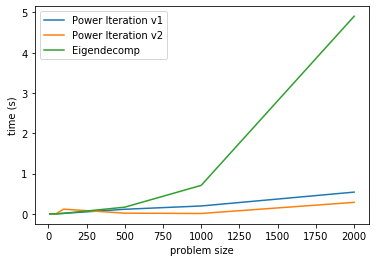

In [17]:
# Plot time of each method vs. problem size
plt.plot(nRange,data)
plt.xlabel('problem size')
plt.ylabel('time (s)')
plt.legend(('Power Iteration v1','Power Iteration v2','Eigendecomp'));